# Naive Baes

- минус в том, что он не видит взаимосвязь между фичами, хотя на практике такое крайне редко

Бинарные данные - ДА / НЕТ(слакдоксть, желтость, длинность)

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import math

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [21]:
data = np.array([[400, 350, 450, 500],
                 [0, 150, 300, 300],
                 [30, 180, 100, 200],
                 [430, 680, 850, 100]])
idx = ['Banana', 'Orange', 'Plum', 'Total']
col = ['Long', 'Sweet', 'Yellow', 'Total']

fruits = pd.DataFrame(data, columns=col, index=idx)
fruits

,Long,Sweet,Yellow,Total
Banana,400,350,450,500
Orange,0,150,300,300
Plum,30,180,100,200
Total,430,680,850,100


Просчитаем по формуле баеса вероятность принадлежности к каждому классу фрукта при всех трех трушных условиях

In [22]:
result = {}
for i in range(fruits.values.shape[0] - 1):
    p = 1
    for j in range(fruits.values.shape[1] - 1):
        p *= fruits.values[i, j] / fruits.values[i, -1] #вероятность трушности фичи для этого фрукта
    p *= fruits.values[i, -1] / fruits.values[-1, -1]   #вероятность самого фрукта
    result[fruits.index[i]] = p

result

{'Banana': 2.52, 'Orange': 0.0, 'Plum': 0.135}

Очевидно, что наш алгоритм отнесет этот фрукт к бананам

Что делаеть если наши данные непрерывны(длина листка из iris and etc.) ??

x_train shape: (112, 2), y_train shape:(112,),
 x_test shape:(38, 2), y_test shape:, (38,)


,0,1,2
0,4.2,1.5,1.0
1,4.0,1.2,1.0
2,5.5,2.1,2.0
3,1.3,0.2,0.0
4,5.1,2.3,2.0


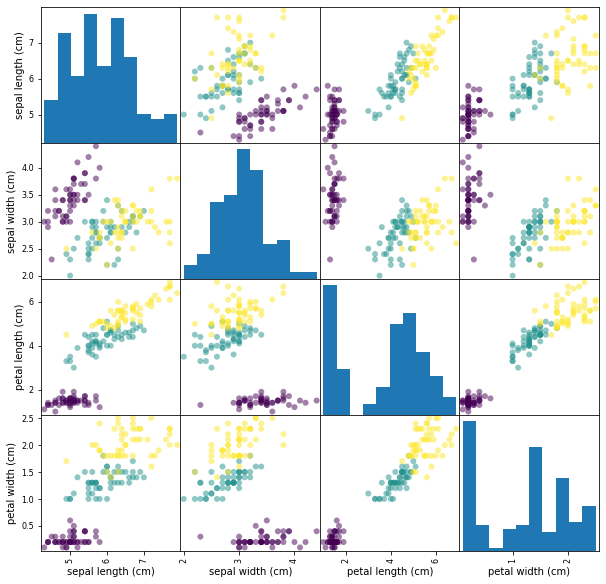

In [23]:
iris_dataset = load_iris()
iris_dataset.keys()

iris_df = pd.DataFrame(iris_dataset.data, columns=iris_dataset.feature_names)
scat_mtrx = pd.plotting.scatter_matrix(iris_df, c=iris_dataset.target, figsize=(10, 10), marker='o')

x_train, x_test, y_train, y_test = train_test_split(
    iris_dataset.data[:, 2:4],        #если брать все фичи, то процент точности вырастет
    iris_dataset.target,
    random_state=0
    )

print(f'x_train shape: {x_train.shape}, y_train shape:{y_train.shape},\n',
    f'x_test shape:{x_test.shape}, y_test shape:, {y_test.shape}')
    #Чтобы было все окей - одинаковое кол-во строк в каждой группе - по цп 1 столбец, по фичам - сколь угодно

x_train_concat = np.concatenate((x_train, y_train.reshape(112, 1)), axis=1)
x_test_concat = np.concatenate((x_test, y_test.reshape(38, 1)), axis=1)

pd.DataFrame(x_train_concat).head(5)

In [24]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

nb = GaussianNB()

nb_model = nb.fit(x_train, y_train)
nb_predict = nb_model.predict(x_test)
nb_predict

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2])

In [25]:
accuracy_score(nb_predict, y_test)  #если брать все фичи, то 100%

0.9736842105263158